In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
from cmcrameri import cm

In [2]:
EXPERIMENT_NAME = 'P3856_YHE211'
EXPERIMENT_DIR = '/media/big-ssd/experiments/{}'.format(EXPERIMENT_NAME)

In [3]:
EXTRACTED_FEATURES_DB_NAME = '{}/extracted-features/extracted-features.sqlite'.format(EXPERIMENT_DIR)
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
extracted_features_df = pd.read_sql_query("select sequence,charge,run_name,target_coords,monoisotopic_mz_centroid,rt_apex,scan_apex from features where classed_as == \'target\'", db_conn)
db_conn.close()


In [4]:
extracted_features_df['target_coords_d'] = extracted_features_df.apply(lambda row: json.loads(row.target_coords), axis=1)
extracted_features_df['target_coords_mz'] = extracted_features_df.apply(lambda row: row.target_coords_d['mono_mz'], axis=1)
extracted_features_df['target_coords_rt'] = extracted_features_df.apply(lambda row: row.target_coords_d['rt_apex'], axis=1)
extracted_features_df['target_coords_scan'] = extracted_features_df.apply(lambda row: row.target_coords_d['scan_apex'], axis=1)


In [5]:
extracted_features_df['delta_mz_ppm'] = (extracted_features_df.monoisotopic_mz_centroid - extracted_features_df.target_coords_mz) / extracted_features_df.target_coords_mz * 1e6
extracted_features_df['delta_rt'] = extracted_features_df.target_coords_rt - extracted_features_df.rt_apex
extracted_features_df['delta_scan'] = extracted_features_df.target_coords_scan - extracted_features_df.scan_apex


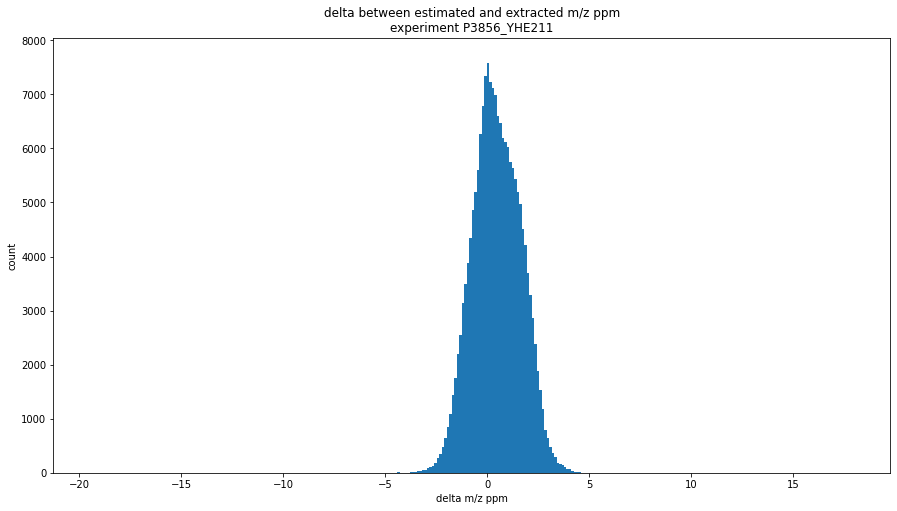

In [6]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_mz_ppm
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta m/z ppm')
plt.ylabel('count')
plt.title('delta between estimated and extracted m/z ppm\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()

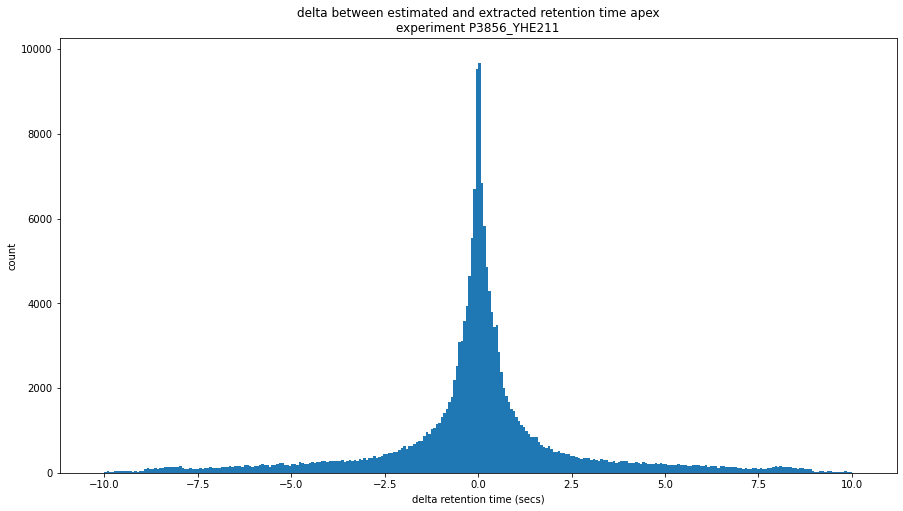

In [7]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_rt
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta retention time (secs)')
plt.ylabel('count')
plt.title('delta between estimated and extracted retention time apex\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()

In [8]:
extracted_features_df[(extracted_features_df.delta_rt<-4)][['sequence','charge','run_name','rt_apex','target_coords_rt','delta_rt']].sample(n=15)

,sequence,charge,run_name,rt_apex,target_coords_rt,delta_rt
78246,HVDPFMEWTQIITK,2,P3856_YHE211_5_Slot1-1_1_5108,2140.242920,2135.733187,-4.509733
56419,DQNIEESEADLLDWTNNVR,2,P3856_YHE211_4_Slot1-1_1_5107,2158.247803,2154.131949,-4.115854
104340,TLQEQMDELLQQCFLHALK,3,P3856_YHE211_6_Slot1-1_1_5109,2251.972168,2246.242115,-5.730053
51786,VDNDENEHQLSLR,2,P3856_YHE211_3_Slot1-1_1_5106,1640.272217,1635.503073,-4.769144
114213,IALESEGRPEEQMESDNCSGGDDDWTHLSSK,3,P3856_YHE211_7_Slot1-1_1_5110,1769.527344,1765.066034,-4.461309
45399,LNLSCIHSPVVNELMR,2,P3856_YHE211_3_Slot1-1_1_5106,1954.131592,1949.537518,-4.594074
35914,AAVAVAQSNHQK,2,P3856_YHE211_3_Slot1-1_1_5106,892.916321,888.546654,-4.369667
150041,HSYAQSSHIR,2,P3856_YHE211_9_Slot1-1_1_5112,885.432373,880.917295,-4.515078
19698,DEAGHFLWPGFGENAR,2,P3856_YHE211_2_Slot1-1_1_5105,1995.110352,1989.503303,-5.607048
23142,GFVFITFKEEEPVK,2,P3856_YHE211_2_Slot1-1_1_5105,1956.479126,1952.302680,-4.176446


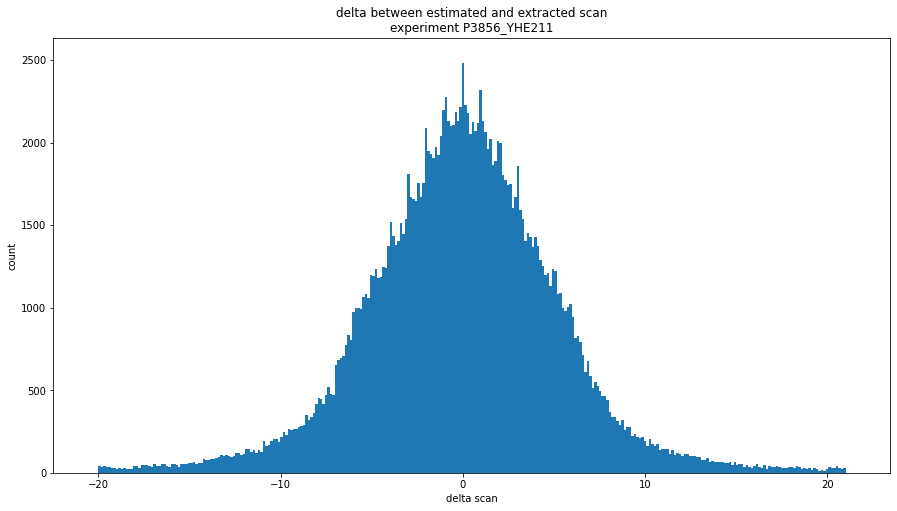

In [9]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_scan
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta scan')
plt.ylabel('count')
plt.title('delta between estimated and extracted scan\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()